In [1]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: googleplaystore.csv     


In [3]:
data = pd.read_csv('googleplaystore.csv')
data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,NaN,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [4]:
# show first five dataframe content

data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Filtering the data

In [5]:
data['Size'] = data.Size.str.replace('M','')

In [6]:
data['Size'] = data.Size.str.replace('Varies with device','0')

In [7]:
data['Size'] = data.Size.str.replace('k','')

In [8]:
data['Size'] = data.Size.str.replace('+','')

In [9]:
data['Size'] = data.Size.str.replace(',','')

In [10]:
#data['Size'].unique()

In [11]:
data['Installs'] = data.Installs.str.replace('+','')

In [12]:
data['Installs'] = data.Installs.str.replace(',','')

In [13]:
data['Installs'] = data.Installs.str.replace('Free','0')

In [14]:
#data['Installs'].unique()

In [15]:
data['Price'] = data.Price.str.replace('$','')

In [16]:
data['Price'] = data.Price.str.replace('Everyone','0')

In [17]:
#data['Price'].unique()

In [18]:
#data['Reviews'] = data.Reviews.str.replace('M','')

In [19]:
#data['Reviews'].unique()

In [20]:
data['Size'] = data['Size'].astype('float')

In [21]:
data['Installs'] = data['Installs'].astype('float')

In [22]:
data['Price'] = data['Price'].astype('float')

In [23]:
data['Reviews'] = data['Reviews'].astype('float')

In [24]:
# explore the data type at each series\n
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
labelencoder = LabelEncoder()

data["App_N"] = labelencoder.fit_transform(data["App"])
data["Category_N"] = labelencoder.fit_transform(data["Category"])
data["Type_N"] = labelencoder.fit_transform(data["Type"])
data["Content Rating_N"] = labelencoder.fit_transform(data["Content Rating"])


In [27]:
data["App"] = data["App"].astype('category')
data["Category"] = data["Category"].astype('category')
data["Type"] = data["Type"].astype('category')
data["Content Rating"] = data["Content Rating"].astype('category')


In [28]:
data["App"] = data["App"].cat.codes
data["Category"] = data["Category"].cat.codes
data["Type"] = data["Type"].cat.codes
data["Content Rating"] = data["Content Rating"].cat.codes

In [29]:
data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App_N,Category_N,Type_N,Content Rating_N
0,4.1,6962,0,159.0,19.0,10000.0,0,0.0,1,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,6962,0,0,1
1,3.9,2632,0,967.0,14.0,500000.0,0,0.0,1,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,2632,0,0,1
2,4.7,8656,0,87510.0,8.7,5000000.0,0,0.0,1,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,8656,0,0,1
3,4.5,7827,0,215644.0,25.0,50000000.0,0,0.0,4,Art & Design,08-Jun-18,Varies with device,4.2 and up,7827,0,0,4
4,4.3,7022,0,967.0,2.8,100000.0,0,0.0,1,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,7022,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.5,8173,11,38.0,53.0,5000.0,0,0.0,1,Education,25-Jul-17,1.48,4.1 and up,8173,11,0,1
10836,5.0,4609,11,4.0,3.6,100.0,0,0.0,1,Education,06-Jul-18,1,4.1 and up,4609,11,0,1
10837,NaN,6891,20,3.0,9.5,1000.0,0,0.0,1,Medical,20-Jan-17,1,2.2 and up,6891,20,0,1
10838,4.5,8394,3,114.0,0.0,1000.0,0,0.0,3,Books & Reference,19-Jan-15,Varies with device,Varies with device,8394,3,0,3


In [30]:
data.dtypes

Rating              float64
App                   int16
Category               int8
Reviews             float64
Size                float64
Installs            float64
Type                   int8
Price               float64
Content Rating         int8
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
App_N                 int64
Category_N            int64
Type_N                int64
Content Rating_N      int64
dtype: object

In [31]:
# How many rows and columns does the dataset have?

data.shape

(10840, 17)

In [32]:
data = data.drop(columns=['Current Ver','Android Ver','Genres','Last Updated','App_N','Category_N','Type_N','Content Rating_N'])
data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,6962,0,159.0,19.0,10000.0,0,0.0,1
1,3.9,2632,0,967.0,14.0,500000.0,0,0.0,1
2,4.7,8656,0,87510.0,8.7,5000000.0,0,0.0,1
3,4.5,7827,0,215644.0,25.0,50000000.0,0,0.0,4
4,4.3,7022,0,967.0,2.8,100000.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...
10835,4.5,8173,11,38.0,53.0,5000.0,0,0.0,1
10836,5.0,4609,11,4.0,3.6,100.0,0,0.0,1
10837,NaN,6891,20,3.0,9.5,1000.0,0,0.0,1
10838,4.5,8394,3,114.0,0.0,1000.0,0,0.0,3


In [33]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows.

data[np.logical_and(data['Type'] == 'Free', data['Price'] > 0)]


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating


In [34]:
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,6962,0,159.0,19.0,10000.0,0,0.0,1
1,3.9,2632,0,967.0,14.0,500000.0,0,0.0,1
2,4.7,8656,0,87510.0,8.7,5000000.0,0,0.0,1
3,4.5,7827,0,215644.0,25.0,50000000.0,0,0.0,4
4,4.3,7022,0,967.0,2.8,100000.0,0,0.0,1


In [35]:
data.dtypes

Rating            float64
App                 int16
Category             int8
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
dtype: object

In [36]:
data.describe()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
count,9366.000000,10840.000000,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,4.191757,4900.667989,16.725369,4.441529e+05,31.244382,1.546434e+07,0.073708,1.027368,1.465037
std,0.515219,2781.525396,8.353310,2.927761e+06,91.805256,8.502936e+07,0.261661,15.949703,1.006151
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,0.000000,0.000000
25%,4.000000,2489.750000,11.000000,3.800000e+01,3.100000,1.000000e+03,0.000000,0.000000,1.000000
50%,4.300000,4944.500000,14.000000,2.094000e+03,10.000000,1.000000e+05,0.000000,0.000000,1.000000
75%,4.500000,7301.000000,25.000000,5.477550e+04,28.000000,5.000000e+06,0.000000,0.000000,1.000000
max,5.000000,9658.000000,32.000000,7.815831e+07,1020.000000,1.000000e+09,1.000000,400.000000,5.000000


In [37]:
data.columns

Index(['Rating', 'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating'],
      dtype='object')

In [38]:
data.nunique()

Rating              39
App               9659
Category            33
Reviews           6001
Size               421
Installs            20
Type                 3
Price               92
Content Rating       6
dtype: int64

In [39]:
data['Type'].unique()

array([ 0,  1, -1], dtype=int8)

# Handling Missings

In [50]:
data.isnull().tail() 

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
10833,False,False,False,False,False,False,False,False,False
10835,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False


In [51]:
data.isnull().sum()

Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [52]:
data[data.Rating.isnull()]   

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating


In [53]:
data.dropna(subset=['Rating'], inplace=True)

In [54]:
data.shape

(9366, 9)

In [55]:
data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,6962,0,159.0,19.0,10000.0,0,0.0,1
1,3.9,2632,0,967.0,14.0,500000.0,0,0.0,1
2,4.7,8656,0,87510.0,8.7,5000000.0,0,0.0,1
3,4.5,7827,0,215644.0,25.0,50000000.0,0,0.0,4
4,4.3,7022,0,967.0,2.8,100000.0,0,0.0,1


In [56]:
y = data['Rating']
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.0
10835    4.5
10836    5.0
10838    4.5
10839    4.5
Name: Rating, Length: 9366, dtype: float64

In [57]:
#data = data.drop(columns=['Rating'])
#data

In [58]:
X = data.loc[:,'App':'Content Rating']
X

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,6962,0,159.0,19.0,10000.0,0,0.0,1
1,2632,0,967.0,14.0,500000.0,0,0.0,1
2,8656,0,87510.0,8.7,5000000.0,0,0.0,1
3,7827,0,215644.0,25.0,50000000.0,0,0.0,4
4,7022,0,967.0,2.8,100000.0,0,0.0,1
...,...,...,...,...,...,...,...,...
10833,4303,11,7.0,2.6,500.0,0,0.0,1
10835,8173,11,38.0,53.0,5000.0,0,0.0,1
10836,4609,11,4.0,3.6,100.0,0,0.0,1
10838,8394,3,114.0,0.0,1000.0,0,0.0,3


In [59]:
data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,6962,0,159.0,19.0,10000.0,0,0.0,1
1,3.9,2632,0,967.0,14.0,500000.0,0,0.0,1
2,4.7,8656,0,87510.0,8.7,5000000.0,0,0.0,1
3,4.5,7827,0,215644.0,25.0,50000000.0,0,0.0,4
4,4.3,7022,0,967.0,2.8,100000.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...
10833,4.0,4303,11,7.0,2.6,500.0,0,0.0,1
10835,4.5,8173,11,38.0,53.0,5000.0,0,0.0,1
10836,5.0,4609,11,4.0,3.6,100.0,0,0.0,1
10838,4.5,8394,3,114.0,0.0,1000.0,0,0.0,3


# The Visualizing 



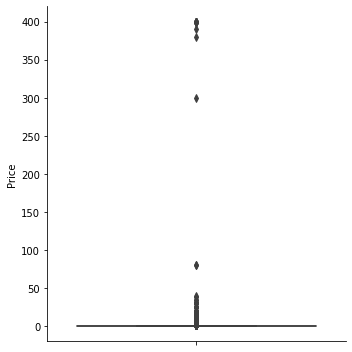

In [60]:
# Boxplot for Price

sns.catplot(y='Price', data=data, kind='box')

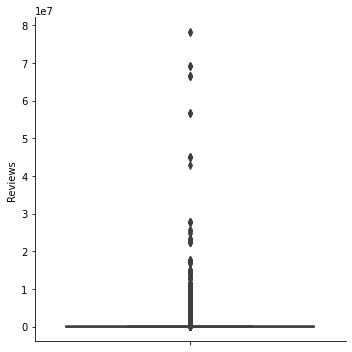

In [61]:
# Boxplot for Reviews

sns.catplot(y='Reviews', data=data, kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


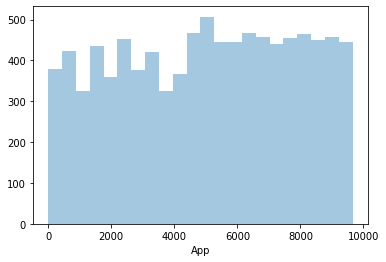

In [62]:
# Histogram for Rating
sns.distplot(a=data['App'], kde=False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


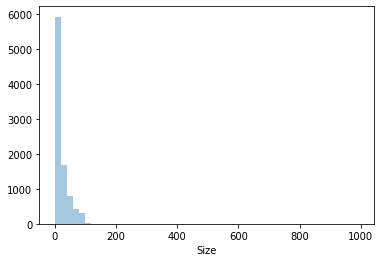

In [63]:
# Histogram for Size

sns.distplot(a=data['Size'], kde=False)

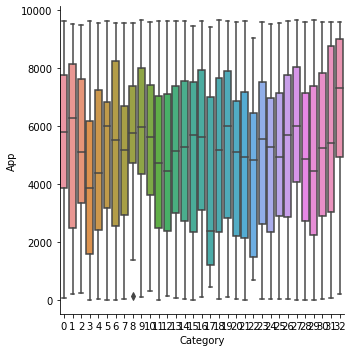

In [64]:
# Category vs. App

sns.catplot(x='Category', y='App', data=data, kind='box')


In [65]:
# View the correlations

data.corr()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
Rating,1.000000,0.037271,-0.034603,0.068141,-0.030264,0.051355,0.039581,-0.021903,0.019868
App,0.037271,1.000000,0.014334,0.031587,-0.024321,0.054028,0.008817,0.012664,0.038950
Category,-0.034603,0.014334,1.000000,0.000883,-0.001964,0.022763,0.023227,-0.012913,-0.105896
Reviews,0.068141,0.031587,0.000883,1.000000,-0.005510,0.641612,-0.043290,-0.009820,0.070528
Size,-0.030264,-0.024321,-0.001964,-0.005510,1.000000,-0.028971,0.053348,0.021993,-0.013337
Installs,0.051355,0.054028,0.022763,0.641612,-0.028971,1.000000,-0.053102,-0.011890,0.053359
Type,0.039581,0.008817,0.023227,-0.043290,0.053348,-0.053102,1.000000,0.223040,-0.046892
Price,-0.021903,0.012664,-0.012913,-0.009820,0.021993,-0.011890,0.223040,1.000000,-0.014088
Content Rating,0.019868,0.038950,-0.105896,0.070528,-0.013337,0.053359,-0.046892,-0.014088,1.000000


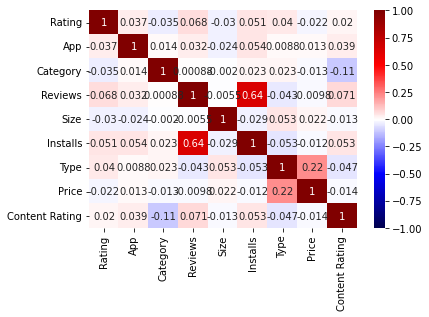

In [66]:
sns.heatmap(data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);



#Questions
- Histogram for Rating 
----- 

which application has the highest rating ?

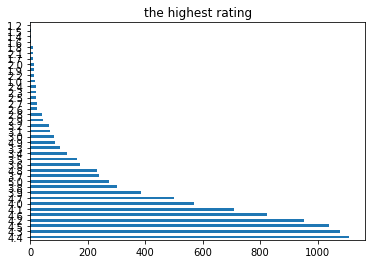

In [67]:
data['Rating'].value_counts().plot(kind='barh', title='the highest rating')
      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


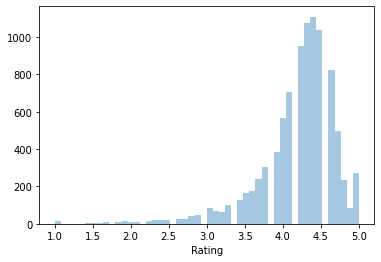

In [68]:
sns.distplot(a=data['Rating'], kde=False)

- Histogram for Size

-------
what is the most popular category

which app has the largest number of installs?


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29c06fc290>


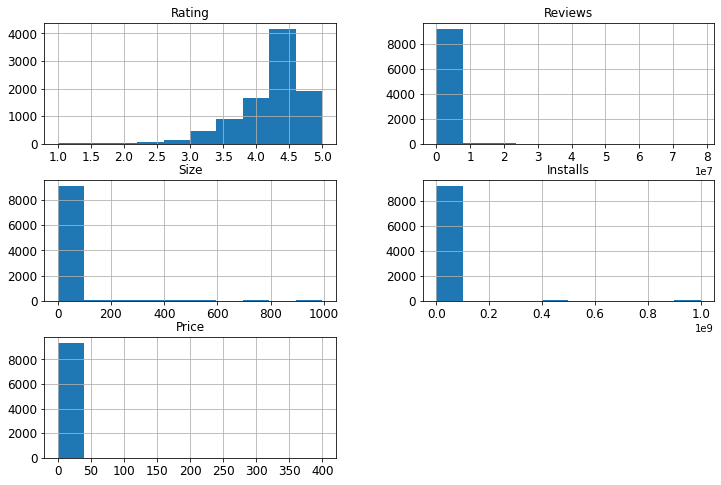

In [70]:
print(data.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29c06f8810>,
      dtype=object)

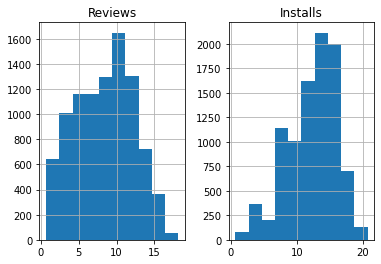

In [71]:
data.Reviews=data.Reviews.apply(func=np.log1p)
data.Installs=data.Installs.apply(func=np.log1p)

data.hist(column=['Reviews','Installs'])

# Train and Test data

In [72]:
data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,4.1,6962,0,5.075174,19.0,9.210440,0,0.0,1
1,3.9,2632,0,6.875232,14.0,13.122365,0,0.0,1
2,4.7,8656,0,11.379520,8.7,15.424949,0,0.0,1
3,4.5,7827,0,12.281389,25.0,17.727534,0,0.0,4
4,4.3,7022,0,6.875232,2.8,11.512935,0,0.0,1
...,...,...,...,...,...,...,...,...,...
10833,4.0,4303,11,2.079442,2.6,6.216606,0,0.0,1
10835,4.5,8173,11,3.663562,53.0,8.517393,0,0.0,1
10836,5.0,4609,11,1.609438,3.6,4.615121,0,0.0,1
10838,4.5,8394,3,4.744932,0.0,6.908755,0,0.0,3


In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


In [74]:
from sklearn.preprocessing import StandardScaler
# scaler = preprocessing.StandardScaler().fit(X)
# X_scaled = scaler.transform(X)
# kddcup = pd.DataFrame(x_scaled)
# kddcup.columns=X.columns

scaler2 = preprocessing.MinMaxScaler().fit(data[data.columns])
x_scaled = scaler2.transform(data[data.columns])
df_sc = pd.DataFrame(x_scaled)
df_sc.columns=data.columns

X = df_sc[df_sc.columns]
#y = df_sc['IC50\n(µM)\n']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
x_test

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating
7880,0.800,0.649684,0.71875,0.347472,0.310865,0.505571,0.0,0.0,0.2
2927,0.875,0.951952,0.87500,0.554448,0.019115,0.655132,0.0,0.0,0.2
7654,0.775,0.266542,0.78125,0.331908,0.003421,0.540176,0.0,0.0,0.2
184,0.825,0.693694,0.12500,0.750824,0.035211,0.885044,0.0,0.0,0.2
6899,1.000,0.223154,0.12500,0.023194,0.003421,0.054848,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...
4257,0.750,0.940768,0.78125,0.338047,0.006841,0.505571,0.0,0.0,0.2
7242,0.775,0.991509,0.50000,0.373638,0.005433,0.505571,0.0,0.0,0.2
679,0.925,0.412965,0.25000,0.486584,0.000000,0.620526,0.0,0.0,0.2
1164,0.875,0.956301,0.40625,0.613772,0.027163,0.655132,0.0,0.0,0.2


In [75]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [76]:
# Training the algorithm

reg_data = LinearRegression()  
reg_data.fit(X_train, y_train) 

LinearRegression()

In [77]:
# Making predictions

y_pred = reg_data.predict(X_test)

In [78]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score=',r2_score(y_test,y_pred))
print('Root Mean Squared Error(RMSE)=',np.sqrt(mean_squared_error(y_test,y_pred)))

# Mean Squared Error
# metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE)=',(mean_squared_error(y_test,y_pred)))
# Mean Absolute Error
# metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error(MAE)=',(metrics.mean_absolute_error(y_test,y_pred)))

R2_Score= 1.0
Root Mean Squared Error(RMSE)= 6.460231697210757e-16
Mean Squared Error(MSE)= 4.173459358164658e-31
Mean Absolute Error(MAE)= 4.171926648564756e-16


In [79]:
# Creating a DF comparing actual values vs predicted values

dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfReg

,Actual,Predicted
10586,4.4,4.4
4493,2.9,2.9
83,4.3,4.3
4951,4.3,4.3
3879,4.3,4.3
...,...,...
8421,4.3,4.3
1492,3.9,3.9
2163,4.4,4.4
7734,3.9,3.9


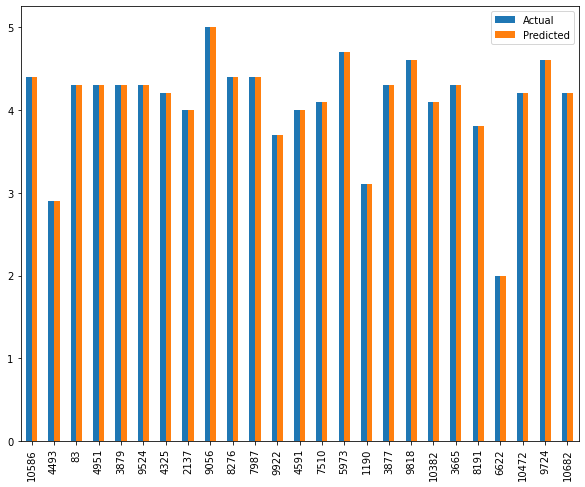

In [80]:
fig=dfReg.head(25)
fig.plot(kind='bar',figsize=(10,8))

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# initialize a score table to log the performance of various algorithms
index = ['LinearRegression','Lasso','Ridge','RandomForestRegressor','GradientBoostingRegressor']
score_table_1 = pd.DataFrame(index = index, columns= ['r2_train','r2_test','mse_train','mse_test',
                                                      "RMSE_train", "RMSE_test", "MAE_train", "MAE_test"])

In [82]:

# define function for plotting the results
def compute_plot_result(algo, y_train, pred_train, y_test, pred_test):
    """compute, log and plot the performance for both training and test sets"""
    # compute the performance
    try:
        r2_train = r2_score(y_train.reshape(1, -1), pred_train)
        r2_test = r2_score(y_test.reshape(1, -1), pred_test)
        mse_train = mean_squared_error(y_train.reshape(1, -1), pred_train)
        mse_test = mean_squared_error(y_test.reshape(1, -1), pred_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train.reshape(1, -1), pred_train))
        RMSE_test = np.sqrt(mean_squared_error(y_test.reshape(1, -1), pred_test))
        MAE_train = metrics.mean_absolute_error(y_train.reshape(1, -1), pred_train)
        MAE_test = metrics.mean_absolute_error((y_test.reshape(1, -1), pred_test))
    except:
        r2_train = r2_score(y_train, pred_train)
        r2_test = r2_score(y_test, pred_test)
        mse_train = mean_squared_error(y_train, pred_train)
        mse_test = mean_squared_error(y_test, pred_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
        RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))
        MAE_train = metrics.mean_absolute_error(y_train, pred_train)
        MAE_test = metrics.mean_absolute_error(y_test, pred_test)
    # log the performance
    score_table_1.loc[algo,:] = r2_train, r2_test, mse_train, mse_test, RMSE_train, RMSE_test, MAE_train, MAE_test

# print('R2_Score=',r2_score(y_test,y_pred))
# print('Root Mean Squared Error(RMSE)=',np.sqrt(mean_squared_error(y_test,y_pred)))

# # Mean Squared Error
# # metrics.mean_squared_error(y_test, y_pred)
# print('Mean Squared Error(MSE)=',(mean_squared_error(y_test,y_pred)))
# # Mean Absolute Error
# # metrics.mean_absolute_error(y_test, y_pred)
# print('Mean Absolute Error(MAE)=',(metrics.mean_absolute_error(y_test,y_pred)))
    

**LinearRegression**

In [83]:
from sklearn.linear_model import Ridge, Lasso

lr = Pipeline([('scaler', MinMaxScaler()),('lr', LinearRegression())])
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

compute_plot_result("LinearRegression", y_train, pred_train, y_test, pred_test)

##########Ridge#########################
Ridge = Pipeline([('scaler', MinMaxScaler()),('Ridge', Ridge())])
Ridge.fit(X_train, y_train)
pred_train = Ridge.predict(X_train)
pred_test = Ridge.predict(X_test)

compute_plot_result("Ridge", y_train, pred_train, y_test, pred_test)

##########Lasso#########################
Lasso = Pipeline([('scaler', MinMaxScaler()),('Lasso', Lasso())])
Lasso.fit(X_train, y_train)
pred_train = Lasso.predict(X_train)
pred_test = Lasso.predict(X_test)

compute_plot_result("Lasso", y_train, pred_train, y_test, pred_test)

**RandomForestRegressor**

In [84]:
# initialize a RandomForestRegressor model with default parameters
rfr_2 = Pipeline([('scaler', MinMaxScaler()),('rfr',RandomForestRegressor())])

# grid search of parameters n_estimators and max_features to improve RandomForestRegressor model
parameters = {'rfr__n_estimators': np.arange(20,80,10), 'rfr__max_features':['auto','sqrt','log2']}
rfr_2_cv = GridSearchCV(rfr_2, parameters, scoring='r2',cv=3)
rfr_2_cv.fit(X_train, y_train)
print('Best parameters:', rfr_2_cv.best_params_)
print('Corresponding R2 score:', rfr_2_cv.best_score_)

Best parameters: {'rfr__max_features': 'auto', 'rfr__n_estimators': 50}
Corresponding R2 score: 0.999980919317828


          feature    importance
0          Rating  9.999203e-01
3         Reviews  6.622808e-05
4            Size  5.974158e-06
2        Category  4.452241e-06
5        Installs  2.470538e-06
1             App  6.237500e-07
7           Price  2.243454e-14
6            Type  1.483536e-14
8  Content Rating  1.371902e-14


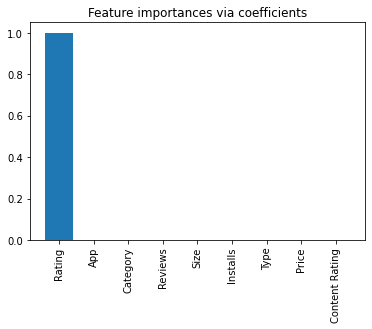

In [85]:
rfr_ne = rfr_2_cv.best_params_['rfr__n_estimators']
rfr_mf = rfr_2_cv.best_params_['rfr__max_features']

# update model with best parameters
rfr_2 = Pipeline([('scaler', MinMaxScaler()),('rfr', RandomForestRegressor(n_estimators=rfr_ne, max_features=rfr_mf, n_jobs=2))])
rfr_2.fit(X_train, y_train)
pred_train = rfr_2.predict(X_train)
pred_test = rfr_2.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rfr_2.named_steps.rfr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))
importance2 = np.abs(rfr_2.named_steps.rfr.feature_importances_)
feature_names = np.array(X_train.columns)
plt.bar(height=importance2, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()
compute_plot_result("RandomForestRegressor",  y_train, pred_train, y_test, pred_test)

In [86]:
# Creating a DF comparing actual values vs predicted values

dfReg = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
dfReg

,Actual,Predicted
10586,4.4,4.4
4493,2.9,2.9
83,4.3,4.3
4951,4.3,4.3
3879,4.3,4.3
...,...,...
8421,4.3,4.3
1492,3.9,3.9
2163,4.4,4.4
7734,3.9,3.9


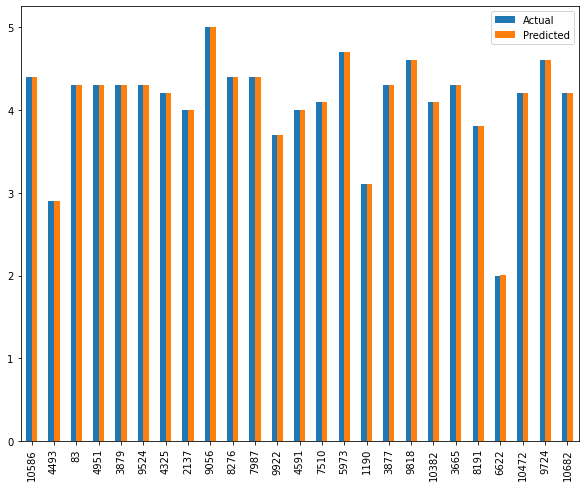

In [87]:
fig=dfReg.head(25)
fig.plot(kind='bar',figsize=(10,8))

**GradientBoostingRegressor**

In [88]:
# initialize a GradientBoostREgressor model with default parameters
gbr_2 = Pipeline([('scaler', MinMaxScaler()),('gbr',GradientBoostingRegressor())])

# grid search of parameter n_estimators, max_features, max_depth, learning_rate to improve GradientBoostingRegressor model
parameters = {'gbr__n_estimators': np.arange(50,500,50), 'gbr__learning_rate': [0.01, 0.05, 0.1, 0.15],'gbr__max_features':['auto','sqrt','log2'],'gbr__max_depth': np.arange(2,7,2)}
gbr_2_cv = GridSearchCV(gbr_2, parameters, scoring='r2',cv=3)
gbr_2_cv.fit(X_train, y_train)
print('Best parameters:', gbr_2_cv.best_params_)
print('Corresponding R2 score:', gbr_2_cv.best_score_)

Best parameters: {'gbr__learning_rate': 0.15, 'gbr__max_depth': 4, 'gbr__max_features': 'auto', 'gbr__n_estimators': 50}
Corresponding R2 score: 0.9999816120009403


In [89]:
lr= gbr_2_cv.best_params_['gbr__learning_rate']
md= gbr_2_cv.best_params_['gbr__max_depth']
mf= gbr_2_cv.best_params_['gbr__max_features']
ns= gbr_2_cv.best_params_['gbr__n_estimators']

          feature    importance
0          Rating  9.999995e-01
3         Reviews  4.585984e-07
4            Size  7.730809e-09
2        Category  5.391374e-09
1             App  1.066925e-10
5        Installs  0.000000e+00
6            Type  0.000000e+00
7           Price  0.000000e+00
8  Content Rating  0.000000e+00


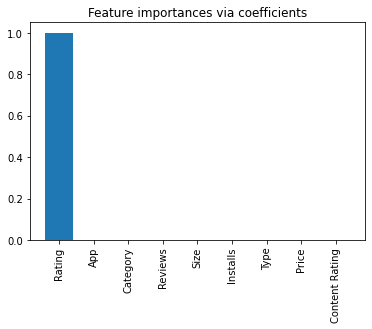

In [90]:
# update model with best parameters
gbr_2 = Pipeline([('scaler', MinMaxScaler()),
                  ('gbr', GradientBoostingRegressor(n_estimators=ns, learning_rate=lr, max_features=mf, max_depth=md))])
gbr_2.fit(X_train, y_train)
pred_train = gbr_2.predict(X_train)
pred_test = gbr_2.predict(X_test)

# print feature importance
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gbr_2.named_steps.gbr.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))
importance = np.abs(gbr_2.named_steps.gbr.feature_importances_)
feature_names = np.array(X_train.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()
compute_plot_result("GradientBoostingRegressor",  y_train, pred_train, y_test, pred_test)

#Results

In [81]:
score_table_1

,r2_train,r2_test,mse_train,mse_test,RMSE_train,RMSE_test,MAE_train,MAE_test
LinearRegression,1,1,4.07836e-31,4.26791e-31,6.3862e-16,6.53292e-16,3.7127e-16,3.92429e-16
Lasso,0,-0.000121659,0.263293,0.273939,0.513121,0.523392,0.357879,0.371367
Ridge,0.999927,0.999927,1.9256e-05,1.99312e-05,0.00438817,0.00446444,0.00298638,0.00309445
RandomForestRegressor,0.999994,0.999999,1.54939e-06,2.94557e-07,0.00124474,0.000542731,4.69834e-05,4.0555e-05
GradientBoostingRegressor,1,1,3.75394e-08,4.78309e-08,0.000193751,0.000218703,0.000113254,0.000119179


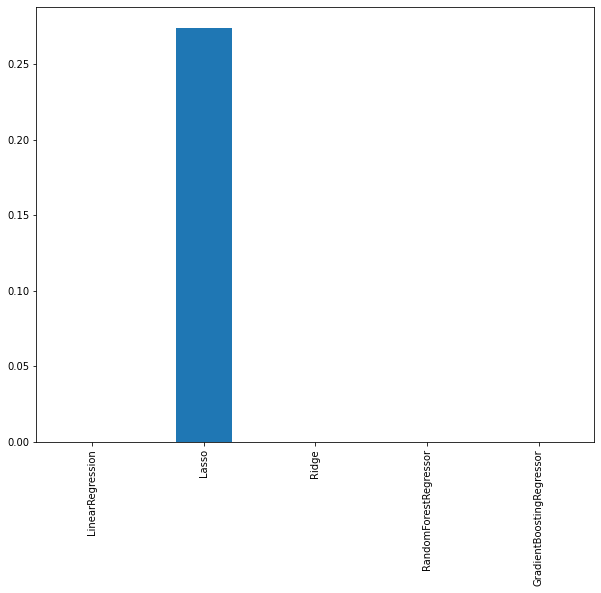

In [82]:
score_table_1["mse_test"].plot(kind='bar',figsize=(10,8))

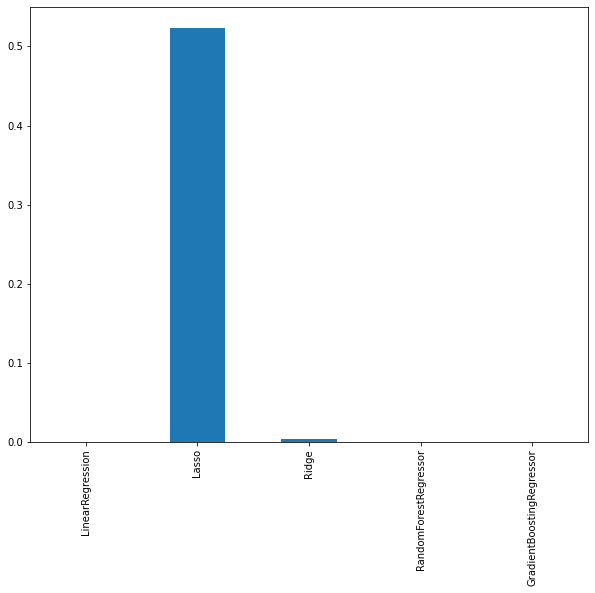

In [83]:
score_table_1["RMSE_test"].plot(kind='bar',figsize=(10,8))

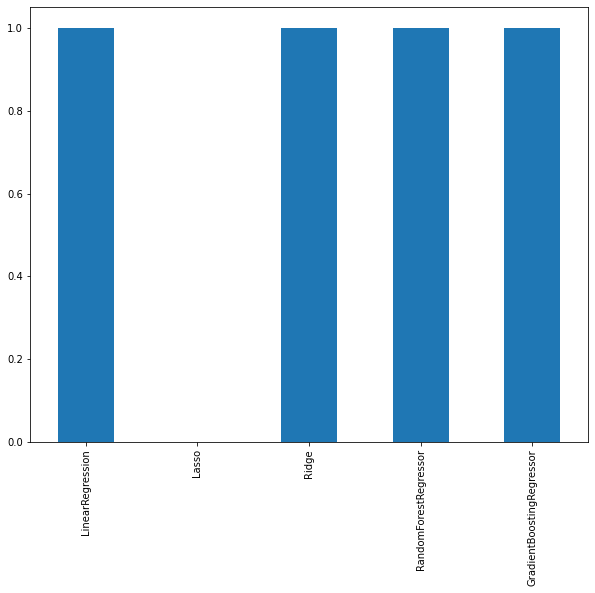

In [84]:
score_table_1["r2_train"].plot(kind='bar',figsize=(10,8))